In [1]:
!pip install pandas plotnine

In [2]:
from plotnine import *

In [3]:
# Import libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns




from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [4]:
# supress warnings from plotnine

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
df1 = pd.read_csv("df.csv")
df1.head()

,GENDER,Car,Property,Children,Income,Job,Education,Martial_Status,Housing,Age,Employed_Years,Family_Size,MONTHS_BALANCE,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,2,0,X
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,2,0,X
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59,3,2,0,X
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,X
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,-22,X


In [6]:
df1

,GENDER,Car,Property,Children,Income,Job,Education,Martial_Status,Housing,Age,Employed_Years,Family_Size,MONTHS_BALANCE,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,2,0,X
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,2,0,X
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59,3,2,0,X
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,X
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,-22,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,48,7,2,0,X
36453,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,34,4,2,0,C
36454,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,34,4,2,0,C
36455,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,49,2,2,0,2


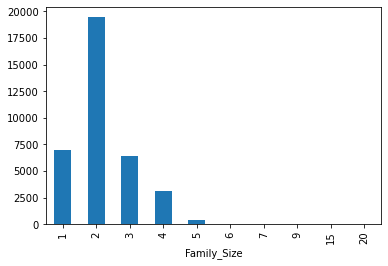

In [7]:
# family member count

df1.groupby('Family_Size').Family_Size.count().plot.bar(ylim=0)
plt.show()

In [8]:
# working category has most. (basically 'other')
# commerercial associate next

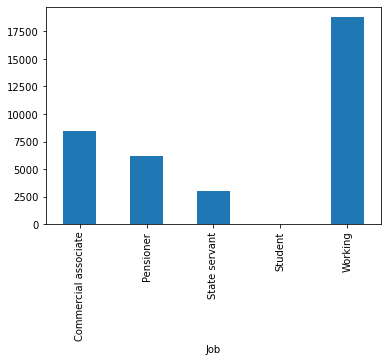

In [8]:
# show graph of type of jobs

df1.groupby('Job').Job.count().plot.bar(ylim=0)
plt.show()

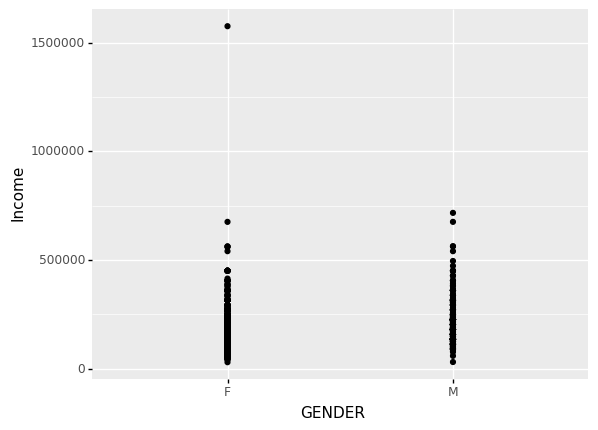

<ggplot: (8768161917163)>

In [9]:
# ggplot male and female per income

ggplot(df1.sample(1000), aes(x = 'GENDER', y = 'Income'))+ geom_point()

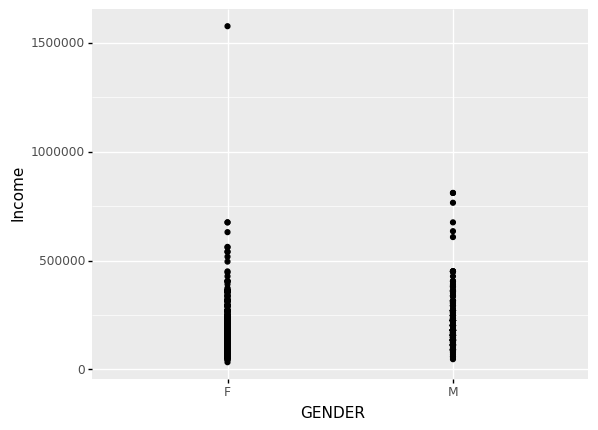

<ggplot: (8768161986777)>

In [10]:
# add a mean line for above

ggplot(df1.sample(1000), aes(x = 'GENDER', y = 'Income'))+ geom_point() + stat_smooth()

<AxesSubplot:ylabel='Car'>

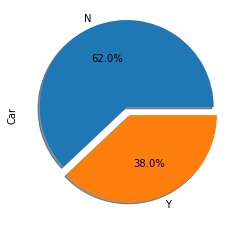

In [11]:
# how many own a car

df1['Car'].value_counts().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.1f%%')

<AxesSubplot:ylabel='GENDER'>

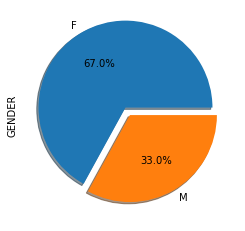

In [12]:
# gender of applicants 

df1['GENDER'].value_counts().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.1f%%')

<AxesSubplot:xlabel='Education'>

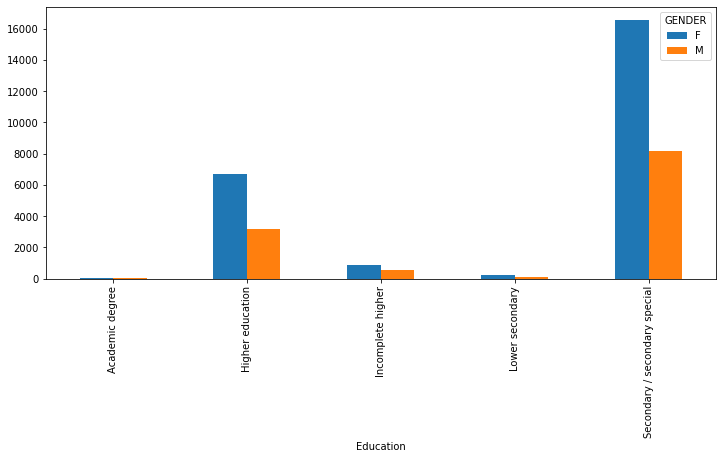

In [15]:
# gender per education and children

g = df1.pivot_table(index='Education', columns='GENDER', aggfunc='size')

g.plot(kind='bar', figsize=(12, 5))

<AxesSubplot:ylabel='GENDER,Education'>

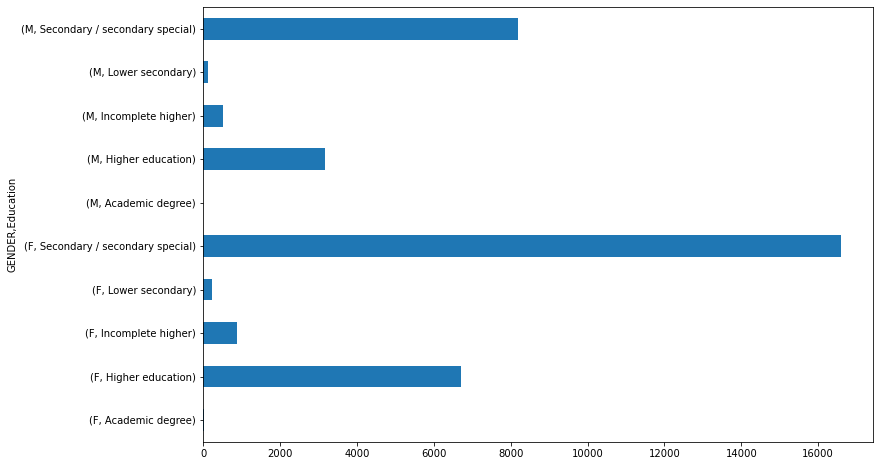

In [16]:
# groupby gender and education

df1.groupby(['GENDER', 'Education']).size().plot(kind='barh', figsize = (12, 8))

<AxesSubplot:ylabel='GENDER,Job'>

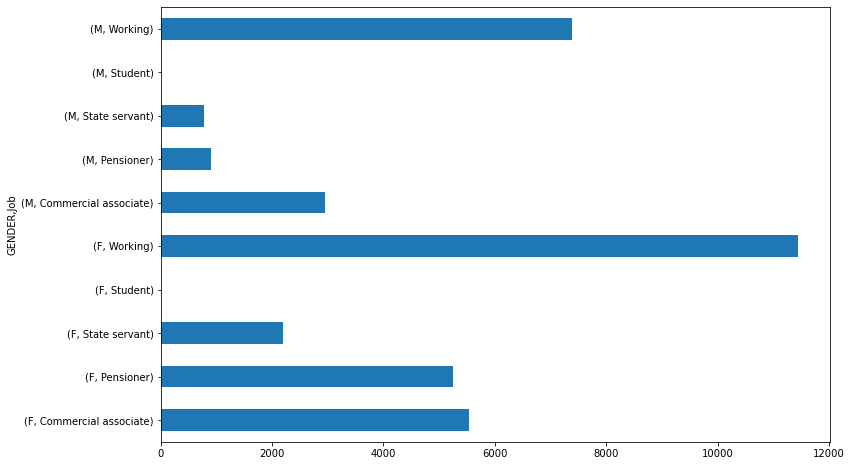

In [20]:
# grouby by gender and job

df1.groupby(['GENDER', 'Job']).size().plot(kind='barh', figsize = (12, 8))

<AxesSubplot:ylabel='GENDER,Job'>

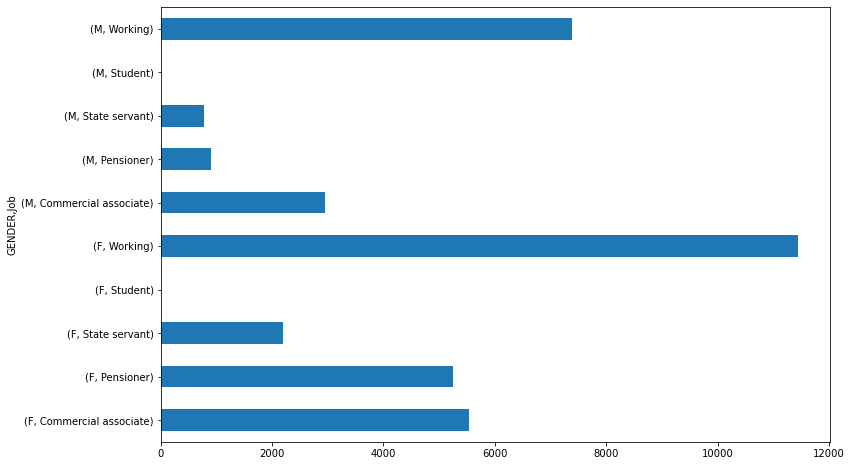

In [24]:
df1.groupby(['GENDER', 'Job']).size().plot(kind='barh', figsize = (12, 8))

In [27]:
 df1.to_csv('df1.csv', index=False)